In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [13]:
df = pd.read_csv('/content/tennis_data.csv')
df

,Day,Outlook,Temp,Humidity,Wind,Play
0,1,rainy,cool,normal,weak,no
1,2,overcast,mild,normal,weak,no
2,3,rainy,cool,high,strong,yes
3,4,rainy,mild,high,weak,no
4,5,rainy,cool,high,strong,yes
...,...,...,...,...,...,...
995,996,overcast,mild,normal,weak,yes
996,997,sunny,cool,high,strong,no
997,998,sunny,cool,normal,strong,no
998,999,overcast,cool,normal,weak,yes


In [15]:
df.describe()

,Day
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [25]:
df.isnull().sum()

Day         0
Outlook     0
Temp        0
Humidity    0
Wind        0
Play        0
dtype: int64

In [ ]:
y = df['Play']
X = df.drop(['Play'],axis=1)

In [16]:
df.columns

Index(['Day', 'Outlook', 'Temp', 'Humidity', 'Wind', 'Play'], dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [24]:
df['Outlook'] = Le.fit_transform(df['Outlook'])
df['Temp'] = Le.fit_transform(df['Temp'])
df['Humidity'] = Le.fit_transform(df['Humidity'])
df['Wind'] = Le.fit_transform(df['Wind'])
df['Play'] = Le.fit_transform(df['Play'])

In [32]:
X = df.drop('Play',axis=1)
y = df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
clf = DecisionTreeClassifier(criterion="gini")

In [34]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(X, y)

[Text(0.6336206896551724, 0.9814814814814815, 'x[1] <= 1.5\ngini = 0.5\nsamples = 1000\nvalue = [499, 501]'),
 Text(0.4931351419878296, 0.9444444444444444, 'x[0] <= 786.5\ngini = 0.499\nsamples = 668\nvalue = [349, 319]'),
 Text(0.341645537525355, 0.9074074074074074, 'x[0] <= 592.5\ngini = 0.495\nsamples = 519\nvalue = [286, 233]'),
 Text(0.15387931034482757, 0.8703703703703703, 'x[0] <= 170.5\ngini = 0.499\nsamples = 387\nvalue = [200, 187]'),
 Text(0.11876267748478701, 0.8333333333333334, 'x[0] <= 137.5\ngini = 0.468\nsamples = 107\nvalue = [67, 40]'),
 Text(0.10121703853955376, 0.7962962962962963, 'x[0] <= 108.5\ngini = 0.495\nsamples = 87\nvalue = [48, 39]'),
 Text(0.07586206896551724, 0.7592592592592593, 'x[0] <= 64.5\ngini = 0.473\nsamples = 73\nvalue = [45, 28]'),
 Text(0.051115618661257606, 0.7222222222222222, 'x[0] <= 38.5\ngini = 0.498\nsamples = 45\nvalue = [24, 21]'),
 Text(0.027586206896551724, 0.6851851851851852, 'x[0] <= 30.5\ngini = 0.466\nsamples = 27\nvalue = [17, 10]

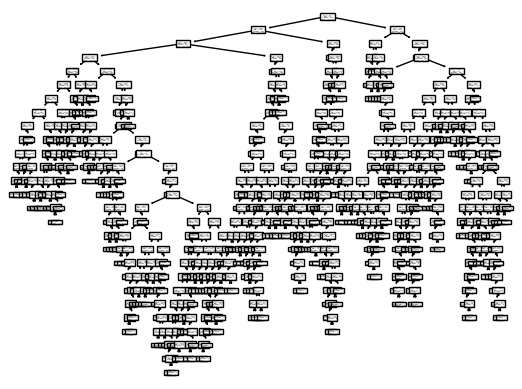

In [35]:
tree.plot_tree(clf)

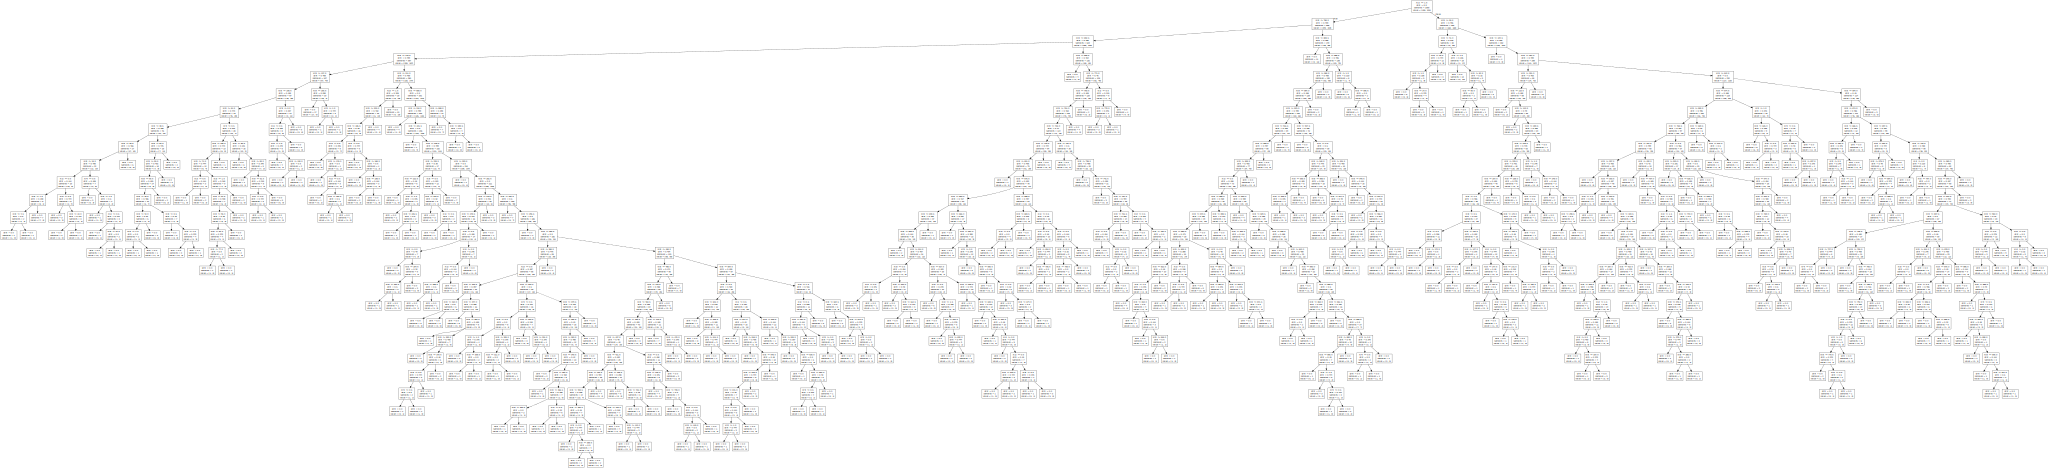

In [36]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [37]:
X_pred = clf.predict(X)

In [38]:
X_pred == y

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: Play, Length: 1000, dtype: bool

In [47]:

from sklearn.metrics import accuracy_score
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)

y_pred_entropy = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy with criterion entropy:", accuracy_entropy)

train_accuracy_entropy = accuracy_score(y_train, dt_entropy.predict(X_train))
test_accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Train set accuracy with criterion entropy:", train_accuracy_entropy)
print("Test set accuracy with criterion entropy:", test_accuracy_entropy)
# Decision Tree with Gini impurity

dt_gini = DecisionTreeClassifier(criterion='gini')

dt_gini.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)

Accuracy with criterion entropy: 0.495
Train set accuracy with criterion entropy: 1.0
Test set accuracy with criterion entropy: 0.495


In [48]:
dt_info_gain = DecisionTreeClassifier(criterion='gini')

dt_info_gain.fit(X_train, y_train)

y_pred_info_gain = dt_info_gain.predict(X_test)

In [49]:
dt_misclassification = DecisionTreeClassifier(criterion='gini', splitter='random')
dt_misclassification.fit(X_train, y_train)
y_pred_misclassification = dt_misclassification.predict(X_test)

In [50]:
X_pred = clf.predict(X)
X_pred == y
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [52]:
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_infogain = DecisionTreeClassifier(criterion="entropy")
clf_misclass = DecisionTreeClassifier(criterion="entropy")

In [53]:
clf_gini.fit(X_train, y_train)
clf_infogain.fit(X_train, y_train)
clf_misclass.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [54]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_infogain = clf_infogain.predict(X_test)
y_pred_misclass = clf_misclass.predict(X_test)


In [55]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_infogain = accuracy_score(y_test, y_pred_infogain)
accuracy_misclass = accuracy_score(y_test, y_pred_misclass)

In [56]:
print("Accuracy with Gini impurity:", accuracy_gini)
print("Accuracy with Information Gain:", accuracy_infogain)
print("Accuracy with Misclassification Error:", accuracy_misclass)

Accuracy with Gini impurity: 0.504
Accuracy with Information Gain: 0.508
Accuracy with Misclassification Error: 0.536


In [57]:
outlook = "sunny"
temp = "cool"
humidity = "high"
wind = "strong"


In [58]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with inbuilt library:", accuracy)

Accuracy with inbuilt library: 0.516


In [59]:
print("Train-set accuracy:", accuracy_gini, accuracy_infogain,accuracy_misclass)
print("Test-set accuracy:", accuracy)

Train-set accuracy: 0.504 0.508 0.536
Test-set accuracy: 0.516


In [60]:
if accuracy_gini > accuracy:
  print("Overfitting")
else:
  print("Underfitting")

Underfitting


In [61]:
from sklearn.tree import export_graphviz
import graphviz

In [62]:
dot_data = export_graphviz(clf_gini, out_file=None, feature_names=X.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("playtennis_gini")

'playtennis_gini.pdf'

In [63]:
clf_entropy = DecisionTreeClassifier(criterion="entropy")

In [64]:

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
y_pred_entropy = clf_entropy.predict(X_test)

In [66]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

In [67]:
print("Train-set accuracy:", accuracy_entropy)
print("Test-set accuracy:", accuracy)

Train-set accuracy: 0.524
Test-set accuracy: 0.516


In [68]:
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)

[[72 54]
 [65 59]]
